# 1. INTRODUÇÃO
A empresa CallMeMaybe é uma empresa de telefonia, ou seja, presta serviços para funcionamento e gestão das ligações entre uma outra empresa e seus clientes. Possibilitando assim a organização das informações, desde: quantidade de ligações, tempo de espera entre as mesmas, conversão das ligações em clientes recorrentes, entre outros. Agora, ela irá implementar um sistema onde será possível para os supervisores **identificar operadores menos eficientes**. Um operador é considerado **ineficiente** se:

- Possui **muitas chamadas recebidas perdidas** (internas ou externas);
- Apresenta **tempo de espera prolongado** nas chamadas recebidas;
- E, no caso de operadores responsáveis por chamadas de saída, realiza **poucas chamadas ativas**.

Isso é importante para os responsáveis identificarem aqueles colaboradores mais produtivos e aqueles que precisam melhorar o seu nível de atendimento. Ou até mesmo ver se o treinamento da equipe está suficiente mediante as demandas.

## 1.1 Descrição do Projeto
Os conjuntos de dados contêm informações sobre o uso do serviço de telefonia virtual **CallMeMaybe**.

Os clientes da empresa são **organizações que precisam gerenciar grandes volumes de chamadas** — tanto recebidas quanto realizadas por diversos operadores.

Os operadores também podem fazer **chamadas internas** entre si, por meio da própria rede da CallMeMaybe.

O dataset compactado **`telecom_dataset_us.csv`** contém as seguintes colunas:

- **`user_id`**: ID da conta do cliente
- **`date`**: data em que as estatísticas foram coletadas
- **`direction`**: “direção” da chamada (`out` para chamadas **saídas**, `in` para chamadas **entrantes**)
- **`internal`**: indica se a chamada foi **interna** (entre operadores de um mesmo cliente)
- **`operator_id`**: identificador do operador
- **`is_missed_call`**: indica se foi uma **chamada perdida**
- **`calls_count`**: número de chamadas
- **`call_duration`**: duração da chamada (sem incluir o tempo de espera)
- **`total_call_duration`**: duração total da chamada (incluindo o tempo de espera)

---

O conjunto de dados **`telecom_clients_us.csv`** contém as seguintes colunas:

- **`user_id`**: ID do cliente
- **`tariff_plan`**: plano tarifário atual do cliente
- **`date_start`**: data de registro do cliente

Agora o próximo passo é seguir com analise desses dados

# 2. DESENVOLVENDO O PROJETO
Essa parte do projeto visa realizar uma analise exploratória a fim de entender melhor os dados que estão sendo trabalhados, se há valoresa ausentes, duplicados ou até mesmo errados de forma que podem prejudicar o desensolver do projeto. Além disso, nesse seguimento iramos mostrar hipoteses, estatisticas, métricas com o objetivo apresentar como é a performance dessa equipe.

## 2.1 Importando bibliotecas
Aqui importo as bibliotecas que irei utilizar para resolver criar o projeto

In [3]:
#Importando bibliotecas

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats as st

## 2.2 Analise Exploratória
Aqui irei olhar diretamente para os dados, entede-los e também, se necessário, corrigi-los.

In [4]:
#carregandos os datasets e lendo os dados 
df_clients = pd.read_csv('telecom_clients.csv')
df_dataset = pd.read_csv('telecom_dataset_new.csv')

In [5]:
#vendo as informações de clients
print("Informações do dataset de clientes:")
print(df_clients.info())

Informações do dataset de clientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [40]:
#Exibindo as primeiras linhas dos datasets
print("Clientes:")
display(df_clients.head())
display(df_clients['user_id'].nunique())

Clientes:


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


732

No dataset de clientes podemos ver que possuimos 732 entradas/linhas e 3 colunas (user_id, tariff_plan, date_star) todas em snake_case. Além disso não possuímos nenhum valor ausente, aparente. No formato das colunas: user_id e tariff_plan estão condizentes com o seu tipo de informação, agora date_start seria ideal estar no formato datetime. E iremos também verificar a possibilidade de valores duplicados.

In [7]:
#verificando se não há valores nulos
print("Valores nulos no dataset de clientes:")
print(df_clients.isnull().sum())

#verificando se não há valores duplicados
print("Valores duplicados no dataset de clientes:")
print(df_clients.duplicated().sum())


Valores nulos no dataset de clientes:
user_id        0
tariff_plan    0
date_start     0
dtype: int64
Valores duplicados no dataset de clientes:
0


In [8]:
#transformando date_start em datetime
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'], format='%Y-%m-%d')
print(df_clients['date_start'].dtype)

datetime64[ns]


Agora iremos olhar para nosso dataset principal

In [9]:
#Vendo informações do dataset principal
print("Informações do dataset principal:")
print(df_dataset.info())

Informações do dataset principal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [ ]:
#Exibindo as primeiras linhas dos datasets
print("Dataset:")
display(df_dataset.head())

Dataset:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,missed_calls_sum,wait_time,active_call_count,ine_eff
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,29.0,5,33.0,1
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,6.0,1,7.0,1
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,6.0,8,7.0,1
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,29.0,25,33.0,1
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,6.0,26,7.0,1


290

Com 53902 entradas/linhas e 8 colunas: user_id, date, direction, internal, operator_id, is_missed_call, calls_count, call_duration, total_call_duration. Todas colunas nomeadas no formato snake_case.
O dataframe possui algumas inconsistências com relação ao formato escolhido para os dados de algumas colunas:
- date: precisa ficar como datetime
- internal: tem que ser como booleano  
- operator: mudar para object

Também temos valores ausentes na coluna de operator_id. 

In [11]:
#mudando o tipo das colunas 
df_dataset['date'] = pd.to_datetime(df_dataset['date'])
df_dataset['call_duration'] = pd.to_numeric(df_dataset['call_duration'], errors='coerce')
df_dataset['internal'] = df_dataset['internal'].astype('bool')
df_dataset['operator_id'] = df_dataset['operator_id'].astype('object')

display(df_dataset.dtypes)
display(df_dataset.head())  

user_id                                    int64
date                   datetime64[ns, UTC+03:00]
direction                                 object
internal                                    bool
operator_id                               object
is_missed_call                              bool
calls_count                                int64
call_duration                              int64
total_call_duration                        int64
dtype: object

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [12]:
#verifciando valores nulos
print("Valores nulos no dataset principal:")
print(df_dataset.isnull().sum())

#olhando para as linahs dos dados nulos 
print("Linhas com valores nulos no dataset principal:")
display(df_dataset[df_dataset.isnull().any(axis=1)])


Valores nulos no dataset principal:
user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
Linhas com valores nulos no dataset principal:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121


Ao analisar o dataframe consigo imaginar que os valores de operator_id que estão como ausentes eles podem ter relação com as colunas: direction, internal e is_missed_call.  
- direction: se fooi uma chamada de entrantes
- internal: se ela foi uma chamada entre operadores internos talvez não seja gerado pelo sistema um id para eles
- is_missed_call: se a chamada foi perdida e interna talvez o sistema não armazena o número do operador 

In [13]:
df_missing = df_dataset[df_dataset['operator_id'].isnull()]

distribution_internal = df_missing['internal'].value_counts(normalize=True) * 100 
print("\nDistribuição da coluna 'internal' para os operator_id faltantes:")
print(distribution_internal)

distribution_direction = df_missing['direction'].value_counts(normalize=True) * 100 
print("\nDistribuição da coluna 'internal' para os operator_id faltantes:")
print(distribution_direction)

distribution_missed = df_missing['is_missed_call'].value_counts(normalize=True) * 100
print("\nDistribuição da coluna 'missed_call' para os operator_id faltantes:")
print(distribution_missed)



Distribuição da coluna 'internal' para os operator_id faltantes:
internal
False    94.958395
True      5.041605
Name: proportion, dtype: float64

Distribuição da coluna 'internal' para os operator_id faltantes:
direction
in     97.552619
out     2.447381
Name: proportion, dtype: float64

Distribuição da coluna 'missed_call' para os operator_id faltantes:
is_missed_call
True     98.507097
False     1.492903
Name: proportion, dtype: float64


Por esse resultado concluo que minha teoria tem força, porque muito provavelmente ligações que foram internas e perdidas o sistema da CallMeMaybe não computa o id do operador, agora vamos dar um jeito de preencher esses valores. Como mudamos o formato de operator_id para object, agora podemos adicionar valores como texto nas células. Para as ligações:
- Ligações perdida + direção de entrada + interna = missed_na
- Ligação interna e externa = internal_na
- Não forem nenhuma das opções acima = error_log

In [14]:
#tirando os valores nulos 
df_dataset = df_dataset.dropna(subset=['operator_id'])
print("Valores nulos após remoção:")
print(df_dataset.isnull().sum())

Valores nulos após remoção:
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


In [15]:
#avaliando valores duplicados 
print("Valores duplicados no dataset principal:")
print(df_dataset.duplicated().sum())
print("Linhas duplicadas no dataset principal:")
display(df_dataset[df_dataset.duplicated()])


Valores duplicados no dataset principal:
4184
Linhas duplicadas no dataset principal:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
62,166377,2019-08-19 00:00:00+03:00,out,False,880026.0,False,14,1519,1598
78,166377,2019-08-22 00:00:00+03:00,out,False,880026.0,True,6,0,55
...,...,...,...,...,...,...,...,...,...
53861,168601,2019-11-20 00:00:00+03:00,out,False,952914.0,True,1,0,2
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


In [16]:
#removendo os valores duplicados
df_dataset.drop_duplicates(inplace=True)

print("Valores duplicados no dataset principal após remoção:")
print(df_dataset.duplicated().sum())

Valores duplicados no dataset principal após remoção:
0


Feita a limpeza dos dados, vamos ver nos nossos dados algumas métricas usando o método describe()

In [17]:
#Vendo as estatísticas descritivas do dataset
print("Estatísticas descritivas do dataset principal:")
print(df_dataset.describe())

Estatísticas descritivas do dataset principal:
             user_id   calls_count  call_duration  total_call_duration
count   41546.000000  41546.000000   41546.000000         41546.000000
mean   167301.311992     16.900424    1009.769172          1321.592813
std       600.418838     59.749373    4064.106117          4785.978633
min    166377.000000      1.000000       0.000000             0.000000
25%    166782.000000      1.000000       0.000000            67.000000
50%    167175.000000      4.000000     106.000000           288.000000
75%    167827.000000     13.000000     770.000000          1104.000000
max    168606.000000   4817.000000  144395.000000        166155.000000


As varíaveis chaves dentro do contexto do projeto seriam principalmente a quantidade de chamadas perdidas (is_missed_call) por operador e também o tempo de espera da chamada

## 2.3 Identificando os Operadores
O projeto visa identificar operadores ineficientes, por tanto, para compreender melhor as características desses irei criar uma coluna que identifica e classifica os operadores em dois grupos os eficiente e ineficientes. Logo, será mais facil entender os indicadores para um bom funcionário e um ruim e criar hipoteses. 

In [18]:
#Descobrindo a média de ligação perdidas por operador 
missed_calls_by_operator = df_dataset[df_dataset['is_missed_call'] == True].groupby('operator_id').size().reset_index(name='missed_calls_sum')
print(missed_calls_by_operator.head())

#Calculando a média de ligações perdidas por operador
average_missed_calls = missed_calls_by_operator['missed_calls_sum'].mean()
print(f"Média de ligações perdidas por operador: {average_missed_calls}")

#unindo os dataframes
df_dataset = df_dataset.merge(missed_calls_by_operator, on='operator_id', how='left')
df_dataset['missed_calls_sum'] = df_dataset['missed_calls_sum'].fillna(0)
print('Novo dataframe com ligações perdidas por operador:')
display(df_dataset.head())


   operator_id  missed_calls_sum
0     879896.0                47
1     879898.0                89
2     880020.0                 6
3     880022.0                29
4     880026.0                87
Média de ligações perdidas por operador: 16.10730593607306
Novo dataframe com ligações perdidas por operador:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,missed_calls_sum
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,29.0
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,6.0
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,6.0
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,29.0
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,6.0


C:\Users\muril\AppData\Local\Temp\ipykernel_25084\3143066971.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=missed_calls_by_operator, x='operator_id', y='missed_calls_sum', ci=None)


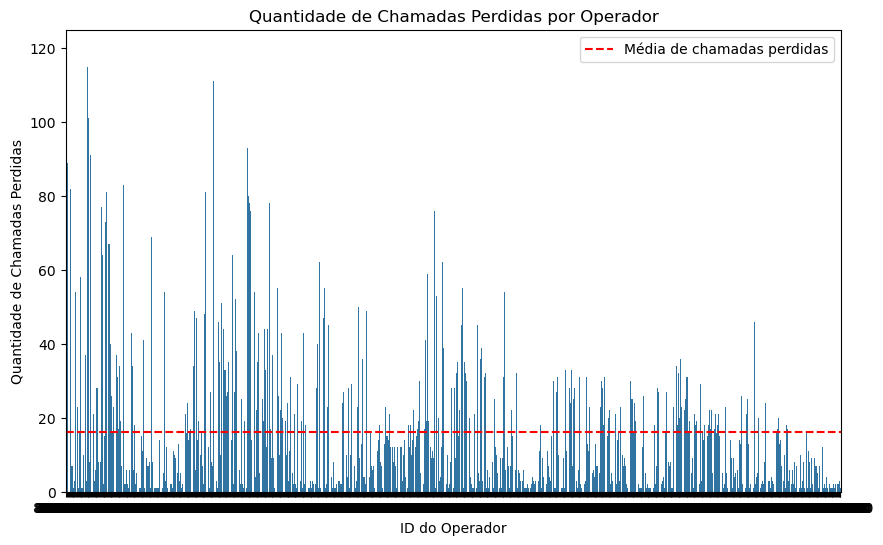

In [42]:
#Plotando a média da quantidade de chamada perdidas
plt.figure(figsize=(10, 6))
sns.barplot(data=missed_calls_by_operator, x='operator_id', y='missed_calls_sum', ci=None)
plt.axhline(average_missed_calls, color='red', linestyle='--', label='Média de chamadas perdidas')
plt.title('Quantidade de Chamadas Perdidas por Operador')
plt.xlabel('ID do Operador')
plt.ylabel('Quantidade de Chamadas Perdidas')
plt.legend()

#exportando dataset
plt.savefig('missed_calls_by_operator.png')
plt.show()

In [20]:
#A média do tempo de espera dos operadores
#tirando os valoresÉ 
#Primeiro criar uma coluna do tempo de espera 
df_dataset['wait_time'] = df_dataset['total_call_duration'] - df_dataset['call_duration']
display(df_dataset['wait_time'].describe())

count    41546.000000
mean       311.823641
std       1175.373073
min          0.000000
25%         19.000000
50%         60.000000
75%        219.000000
max      46474.000000
Name: wait_time, dtype: float64

Olhando para as métricas da minha nova coluna, chegoa  conclusão que eu tenho uma discrepância entre os tempos de espera o que prejudica minha analise, então para lidar com esse evento irei utilizar de percentis para calcular e excluir as anomalias do meus dados.

In [21]:
#calculando os percentis 
percentiles = np.percentile(df_dataset['wait_time'], [25, 50, 75, 90, 95])
print("Percentis do tempo de espera dos operadores:")
for p, value in zip([25, 50, 75, 90, 95], percentiles):
    print(f"{p}º percentil: {value} segundos")
#salvando os datasets tratados

Percentis do tempo de espera dos operadores:
25º percentil: 19.0 segundos
50º percentil: 60.0 segundos
75º percentil: 219.0 segundos
90º percentil: 658.0 segundos
95º percentil: 1233.75 segundos


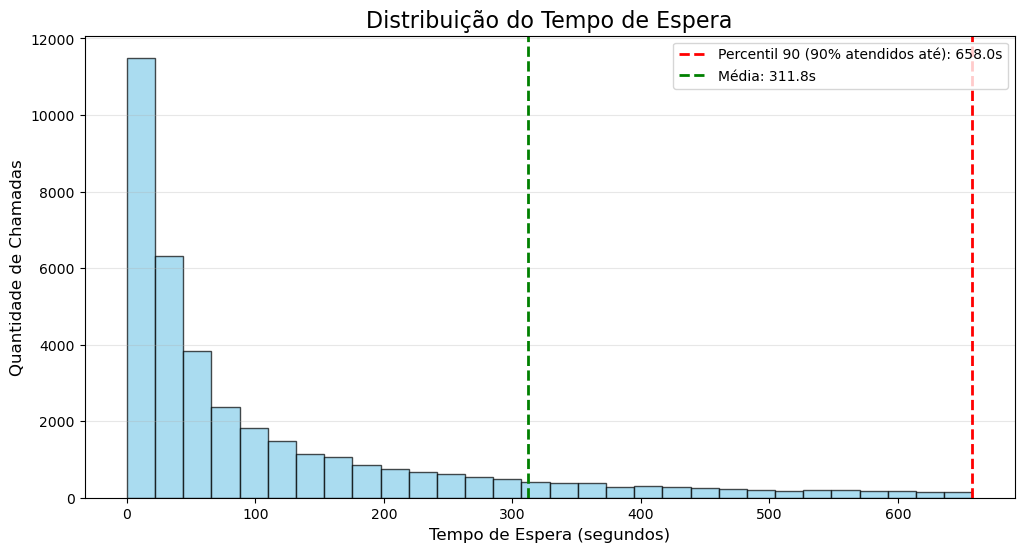

In [43]:
percentil_90 = np.percentile(df_dataset['wait_time'], 90)
media = np.mean(df_dataset['wait_time'])
df_without_anomalia = df_dataset[df_dataset['wait_time'] <= percentil_90]

# 3. Criando o Gráfico
plt.figure(figsize=(12, 6))

# O Histograma
# 'bins' define quantas colunas/faixas de tempo você quer
plt.hist(df_without_anomalia['wait_time'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Linha do Percentil 90 (Onde 90% das chamadas são atendidas)
plt.axvline(percentil_90, color='red', linestyle='dashed', linewidth=2, label=f'Percentil 90 (90% atendidos até): {percentil_90:.1f}s')

# Linha da Média (Para comparação)
plt.axvline(media, color='green', linestyle='dashed', linewidth=2, label=f'Média: {media:.1f}s')

# 4. Formatação Visual
plt.title('Distribuição do Tempo de Espera', fontsize=16)
plt.xlabel('Tempo de Espera (segundos)', fontsize=12)
plt.ylabel('Quantidade de Chamadas', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

#Salvando o Gráfico
plt.savefig('wait_time_distribution.png')
# Mostrar o gráfico
plt.show()

In [23]:
#  Criar faixas (bins) de tempo (ex: a cada 10 segundos) para agrupar os dados
bins = range(0, df_without_anomalia['wait_time'].max() + 10, 10)
df_without_anomalia['time_guide'] = pd.cut(df_without_anomalia['wait_time'], bins=bins)

# Calcular a % de abandono por faixa
# Isso responde: "Das pessoas que esperaram entre 30s e 40s, quantas desistiram?"
analise_abandono = df_without_anomalia.groupby('time_guide', observed=False)['is_missed_call'].apply(
    lambda x: (x.astype(str).str.lower() == 'true').mean() * 100
).reset_index()
display(analise_abandono)

C:\Users\muril\AppData\Local\Temp\ipykernel_25084\2517751701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_anomalia['time_guide'] = pd.cut(df_without_anomalia['wait_time'], bins=bins)


,time_guide,is_missed_call
0,"(0, 10]",32.885154
1,"(10, 20]",22.453180
2,"(20, 30]",24.388112
3,"(30, 40]",27.500966
4,"(40, 50]",27.879387
...,...,...
61,"(610, 620]",44.444444
62,"(620, 630]",46.296296
63,"(630, 640]",36.363636
64,"(640, 650]",44.736842


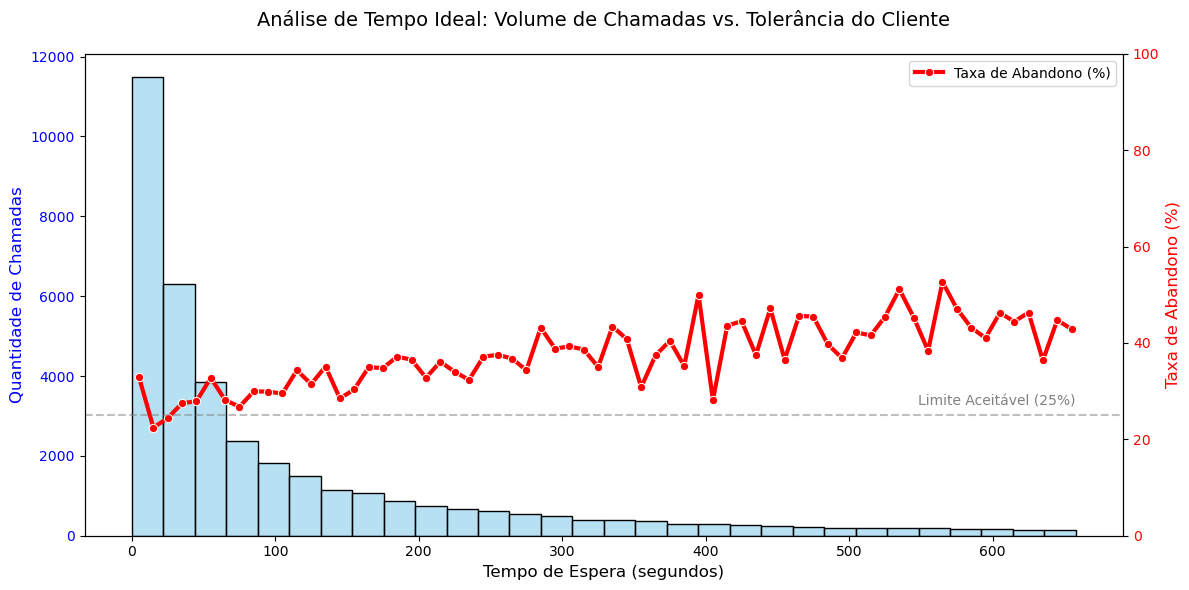

In [45]:

# Pega o ponto médio da faixa para plotar a linha (ex: 35s para a faixa 30-40s)
analise_abandono['mean_time'] = analise_abandono['time_guide'].apply(lambda x: x.mid)

plt.figure(figsize=(12, 6))

# Eixo Esquerdo (Barras): Volume de Chamadas
ax1 = sns.histplot(data=df_without_anomalia, x='wait_time', bins=30, kde=False, color='skyblue', alpha=0.6, label='Volume de Chamadas')
ax1.set_ylabel('Quantidade de Chamadas', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Tempo de Espera (segundos)', fontsize=12)

# Eixo Direito (Linha): Taxa de Abandono
ax2 = ax1.twinx() # Cria um segundo eixo Y compartilhado
sns.lineplot(data=analise_abandono, x='mean_time', y='is_missed_call', color='red', marker='o', ax=ax2, linewidth=3, label='Taxa de Abandono (%)')
ax2.set_ylabel('Taxa de Abandono (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100) # Garante que vai de 0 a 100%

# Títulos e Legendas
plt.title('Análise de Tempo Ideal: Volume de Chamadas vs. Tolerância do Cliente', fontsize=14, pad=20)


# Adicionando uma linha de referência visual (ex: limite aceitável de 10% de abandono)
plt.axhline(y=25, color='gray', linestyle='--', alpha=0.5)
plt.text(x=df_without_anomalia['wait_time'].max(), y=27, s='Limite Aceitável (25%)', color='gray', ha='right')
plt.tight_layout()
#Salvar o Gráfico
plt.savefig('ideal_wait_time_analysis.png')
plt.show()

Ao plotar fica podemos ver que a partir dos 60s temos uma queda na quantidade de chamadas e um aumento progressivo do abandono das mesmas

Agora o objetivo é saber quais são os operadores de saida que possuem poucas chamadas ativas

In [25]:
#identificando os operadores de saida (out) e quantidade de chamadas ativas deles
outgoing_calls = df_dataset[df_dataset['direction'] == 'out']
active_outgoing_calls = outgoing_calls[outgoing_calls['is_missed_call'] == False]
active_calls_by_operator = active_outgoing_calls.groupby('operator_id').size().reset_index(name='active_call_count')

#ordenando os operadores pela quantidade de chamadas ativas
active_calls_by_operator = active_calls_by_operator.sort_values(by='active_call_count', ascending=False)
print("Operadores com mais chamadas ativas (saída):")
print(active_calls_by_operator.head(10))

#Unindo os dataframes
df_dataset = df_dataset.merge(active_calls_by_operator, on='operator_id', how='left')
df_dataset['active_call_count'] = df_dataset['active_call_count'].fillna(0)
print('Novo dataframe com chamadas ativas por operador:')
display(df_dataset.head())

Operadores com mais chamadas ativas (saída):
     operator_id  active_call_count
153     901884.0                125
24      887276.0                110
186     905538.0                100
189     905566.0                 95
21      885876.0                 95
152     901880.0                 93
188     905564.0                 92
37      889410.0                 86
187     905542.0                 84
209     906406.0                 82
Novo dataframe com chamadas ativas por operador:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,missed_calls_sum,wait_time,active_call_count
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,29.0,5,33.0
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,6.0,1,7.0
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,6.0,8,7.0
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,29.0,25,33.0
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,6.0,26,7.0


In [26]:
#percetiles dos operadores com mais chamadas ativas
percentiles_active_calls = np.percentile(active_calls_by_operator['active_call_count'], [25, 50, 75, 90, 95])
print("Percentis das chamadas ativas por operador:")
for p, value in zip([25, 50, 75, 90, 95], percentiles_active_calls):
    print(f"{p}º percentil: {value} chamadas")
    

Percentis das chamadas ativas por operador:
25º percentil: 4.0 chamadas
50º percentil: 12.0 chamadas
75º percentil: 25.0 chamadas
90º percentil: 50.700000000000045 chamadas
95º percentil: 63.34999999999991 chamadas


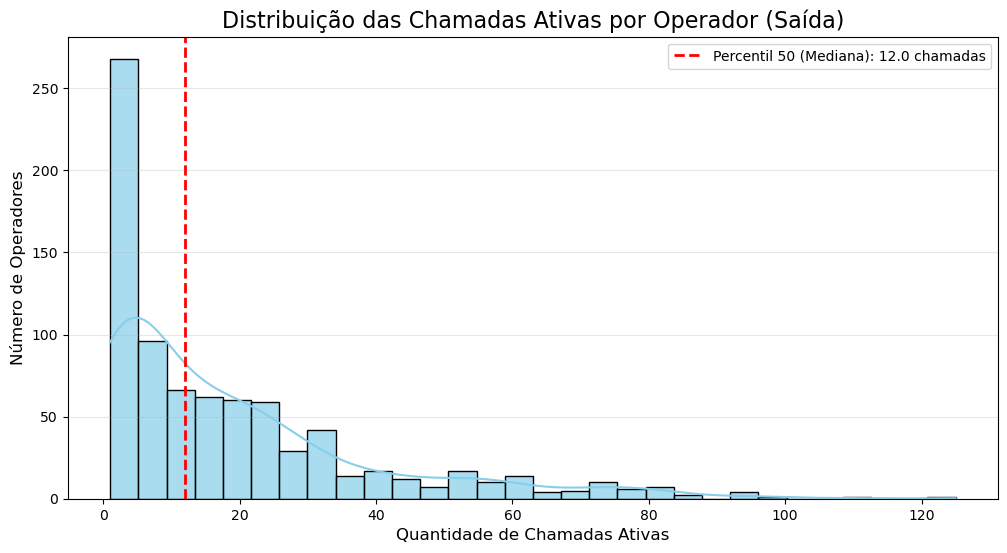

In [47]:
percentil_50 = np.percentile(active_calls_by_operator['active_call_count'], 50)
#plotando as distribuições das chamadas ativas por operador
plt.figure(figsize=(12, 6))
sns.histplot(active_calls_by_operator['active_call_count'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(percentil_50, color='red', linestyle='dashed', linewidth=2, label=f'Percentil 50 (Mediana): {percentil_50:.1f} chamadas')
plt.title('Distribuição das Chamadas Ativas por Operador (Saída)', fontsize=16)
plt.xlabel('Quantidade de Chamadas Ativas', fontsize=12)
plt.ylabel('Número de Operadores', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

#Salvando o Gráfico
plt.savefig('active_calls_distribution.png')
plt.show()

Agora que sabemos que a média de ligações perdidas por operador, o tempo ideal de espera e quantas ligações de saída são necessárias estarem ativas. Agora irei criar uma coluna onde 0 - eficientes e 1 - ineficientes.

Dataframe com coluna de operadores ineficientes/eficientes:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,missed_calls_sum,wait_time,active_call_count,ine_eff
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,29.0,5,33.0,1
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,6.0,1,7.0,1
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,6.0,8,7.0,1
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,29.0,25,33.0,1
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,6.0,26,7.0,1


Análise de Operadores Ineficientes vs Eficientes:
   ine_eff  unique_user_count
0        0                 61
1        1                286


C:\Users\muril\AppData\Local\Temp\ipykernel_25084\100180782.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=inefficiency_analysis, x='ine_eff', y='unique_user_count', palette=['green', 'red'])


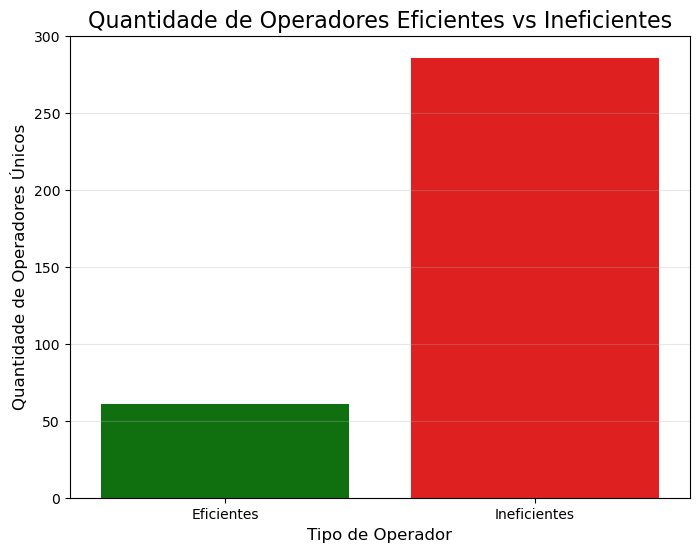

In [46]:
#criando uma coluna que avalia se são operadores ineficientes e eficentes 
df_dataset['ine_eff'] = np.where(
    (df_dataset['missed_calls_sum'] > average_missed_calls) | (df_dataset['active_call_count'] < percentil_50) | (df_dataset['wait_time'] > percentil_90),
    1,
    0 
)

print("Dataframe com coluna de operadores ineficientes/eficientes:")
display(df_dataset.head())

#agrupando os dois grupos de operadores ine e ef, para identificar quantos operadores há em cada um
inefficiency_analysis = df_dataset.groupby('ine_eff', observed=False)['user_id'].nunique().reset_index(name='unique_user_count')
print("Análise de Operadores Ineficientes vs Eficientes:")
print(inefficiency_analysis)

#plotando o gráfico de operadores ineficientes vs eficientes
plt.figure(figsize=(8, 6))
sns.barplot(data=inefficiency_analysis, x='ine_eff', y='unique_user_count', palette=['green', 'red'])
plt.xticks([0, 1], ['Eficientes', 'Ineficientes'])
plt.title('Quantidade de Operadores Eficientes vs Ineficientes', fontsize=16)
plt.xlabel('Tipo de Operador', fontsize=12)
plt.ylabel('Quantidade de Operadores Únicos', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.savefig('efficient_vs_inefficient_operators.png')
plt.show()


## 2.4 Criando Hipoteses 
Vamos desenvolver uma para determinar os motivos de um operador ser eficiente ou não:
- 1º: Se um operador é ineficente por conta das chamadas perdidas;
- 2º: Se um operador é ineficente por conta do tempo de espera.

In [29]:
#Testando a hipotese Se um operador é ineficente por conta das chamadas perdidas;
#criando as variasveis para o teste t, separando os operadores ineficientes e eficientes que perderam a chamadas	
missed_ine = df_dataset[df_dataset['ine_eff'] == 1]['missed_calls_sum']
missed_eff = df_dataset[df_dataset['ine_eff'] == 0]['missed_calls_sum']

alpha = 0.05

#Primeiro vou fazer o levene teste para verificar se as variancias são iguais
levene_stat, levene_p = st.levene(missed_ine, missed_eff)
print(f"Levene's test statistic: {levene_stat}, p-value: {levene_p}")

# Teste t (com ou sem igualdade de variâncias, dependendo do resultado de Levene)
equal_var = levene_p > alpha
print(f"Equal variances: {equal_var}")
results = st.ttest_ind(missed_ine, missed_eff, equal_var=equal_var)

print(missed_ine.mean(), missed_eff.mean(), results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Não podemos rejeitar a hipótese nula")

Levene's test statistic: 3987.638107757318, p-value: 0.0
Equal variances: False
37.99008449502892 11.963514519731943 0.0
Rejeitamos a hipótese nula


In [30]:
#Testando a hipotese Se um operador é ineficente por conta do tempo das chamadas perdidas;
#criando as variasveis para o teste t, separando os operadores ineficientes e eficientes que perderam a chamadas	
time_of_wait_ine = df_dataset[df_dataset['ine_eff'] == 1]['wait_time']
time_of_wait__eff = df_dataset[df_dataset['ine_eff'] == 0]['wait_time']

alpha = 0.05

#Primeiro vou fazer o levene teste para verificar se as variancias são iguais
levene_stat, levene_p = st.levene(time_of_wait_ine, time_of_wait__eff)
print(f"Levene's test statistic: {levene_stat}, p-value: {levene_p}")

# Teste t (com ou sem igualdade de variâncias, dependendo do resultado de Levene)
equal_var = levene_p > alpha
print(f"Equal variances: {equal_var}")
results = st.ttest_ind(time_of_wait_ine, time_of_wait__eff, equal_var=equal_var)

print(time_of_wait_ine.mean(), time_of_wait__eff.mean(), results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Não podemos rejeitar a hipótese nula")

Levene's test statistic: 156.11197061933115, p-value: 9.279934195122442e-36
Equal variances: False
336.36700695684624 83.28220402084885 1.0582558583804368e-305
Rejeitamos a hipótese nula


# 3. CONCLUSÃO 

Esse projeto visa entender quais são os motivos dos operadores serem ineficientes ou não. Logo, fiz uma analise exploratória para limpar nosso dataset, depois leventei com base no contexto o que identificava os operadores ineficientes e depois testei por meio de hipóteses se esses dados faziam sentidos ou não. 
Essas hipóteses foram que a causa da ineficiência é por conta do tempo de espera e/ou por conta das chamadas perdidas. Logo, minha hipotese nula é: se o tempo de espera, ou a quantidade de chamadas perdidas, são iguais nos dois grupos. Ambas foram rejeitadas, ou seja os dois grupos são diferentes por causa das chamadas perdidas e do tempos de espera 